# Question 7

In [52]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
import keras
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

# load train and test dataset
def load_dataset():
    # Loading Dataset
    train_data = np.loadtxt('TinyMNIST/trainData.csv', dtype=np.float32, delimiter=',')
    train_labels = np.loadtxt('TinyMNIST/trainLabels.csv', dtype=np.int32, delimiter=',')
    test_data = np.loadtxt('TinyMNIST/testData.csv', dtype=np.float32, delimiter=',')
    test_labels = np.loadtxt('TinyMNIST/testLabels.csv', dtype=np.int32, delimiter=',')
    class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    # Feature Selection
    tr_samples_size, _ = train_data.shape

    tr_samples_size, feature_size = train_data.shape
    te_samples_size, _ = test_data.shape
    print('Train Data Samples:',tr_samples_size,
          ', Test Data Samples',te_samples_size,
          ', Feature Size(after feature-selection):', feature_size,
           ' Input Shape is : ', train_data.shape,
            'Label Size is: ', np.unique(train_labels))
    
    return train_data, train_labels, test_data, test_labels

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model(neuron_number, optimizer, activation, early_stop):
    
    model = Sequential()
    model.add(Dense(neuron_number, activation=activation))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    model.compile(optimizer=optimizer, loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
    
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    # pyplot.subplot(211)
    pyplot.figure(figsize=(8,8))
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='validatation')
    pyplot.legend()
    pyplot.show()

    # plot accuracy
    # pyplot.subplot(212)
    pyplot.figure(figsize=(8,8))
    pyplot.title('Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='validatation')
    pyplot.legend()
    pyplot.show()

# Default Network: Optimizer=Adam, NumberOfNeuron=100, Activation=Relu, EarlyStoping=False, Epoch=20

# Compare Number of Neurons [100, 50]

####################################################################################
                     Neuron Number is :           50
####################################################################################
Train Data Samples: 5000 , Test Data Samples 2500 , Feature Size(after feature-selection): 196  Input Shape is :  (5000, 196) Label Size is:  [0 1 2 3 4 5 6 7 8 9]
Epoch 1/20
125/125 [==============================] - 0s 2ms/step - loss: 2.2981 - accuracy: 0.1887 - val_loss: 2.2917 - val_accuracy: 0.2140
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 2.2843 - accuracy: 0.2087 - val_loss: 2.2727 - val_accuracy: 0.2120
Epoch 3/20
125/125 [==============================] - 0s 1ms/step - loss: 2.2603 - accuracy: 0.2192 - val_loss: 2.2421 - val_accuracy: 0.2260
Epoch 4/20
125/125 [==============================] - 0s 1ms/step - loss: 2.2234 - accuracy: 0.2743 - val_loss: 2.1984 - val_accuracy: 0.3060
Epoch 5/20
125/125 [=========================

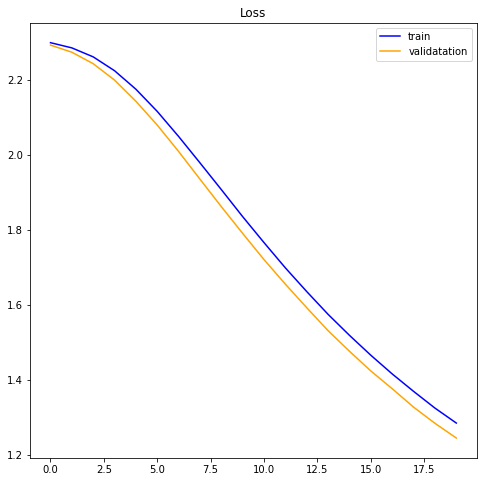

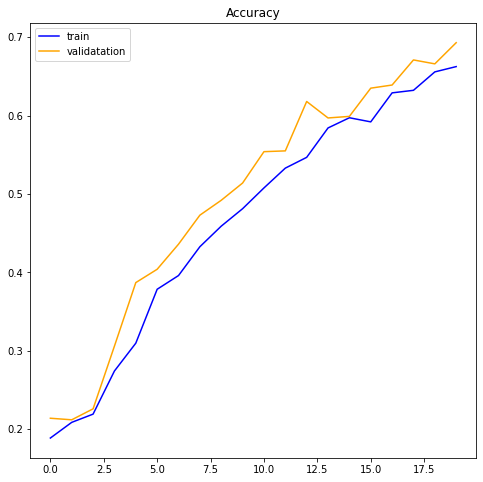

Test Accuracy is :  61.800
Train Accuracy is :  66.250
Train Confusion Matrix
[[474   0   2  22   2   1  19   0   2   0]
 [  0 552   3   7   0   0   0   2   0   0]
 [ 11  43 374  31   5   0  32   3   3   1]
 [ 14  41  14 433   1   0  10  18   4   4]
 [  7  22   2   0 250   0  13  13   2 136]
 [ 32  48   4 195  15  31  19  33  46   6]
 [  9  23  25   4   3   0 448   0   1   0]
 [  4  51   0   2   7   0   1 437   0  18]
 [ 27  92  27 153   5   0  17   4 136  21]
 [ 13  22   1   5  56   0   2 152   1 231]]
Test Confusion Matrix
[[199   0   0   5   0   1  13   0   1   0]
 [  0 281   1   3   0   0   2   0   0   0]
 [  9  39 167  30   2   0  22   6   0   1]
 [  1  20  10 201   1   0   2  14   1   4]
 [  6  12   3   0 121   0  12  16   0 105]
 [ 16   5   6 111   4  10  14  31  15   9]
 [  7  13  12   5   4   0 183   0   0   1]
 [  1  38   2   1   4   0   0 199   3   9]
 [ 11  33  12  91   6   0   5   9  56  19]
 [  3  16   1   4  31   0   1  58   2 128]]
######################################

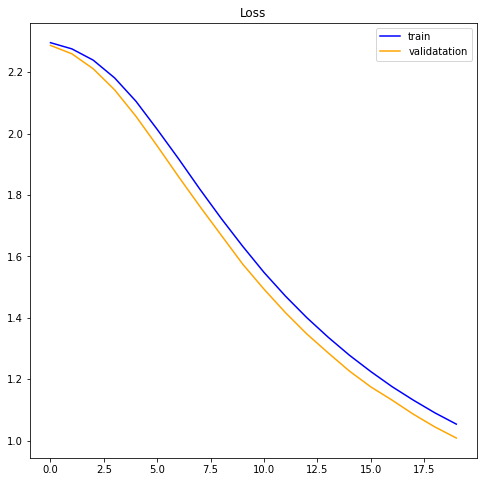

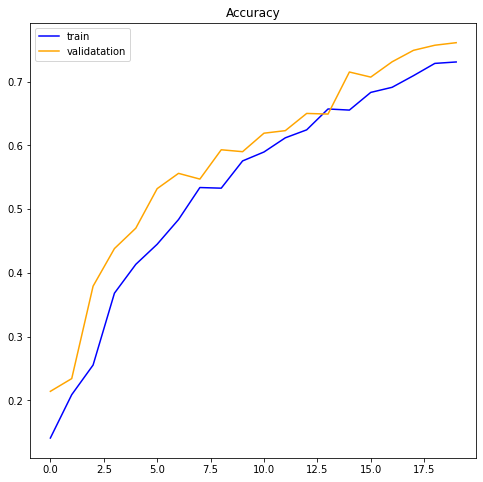

Test Accuracy is :  70.920
Train Accuracy is :  73.075
Train Confusion Matrix
[[479   0   7   7   2   8  11   0   8   0]
 [  0 548   5   2   0   0   0   2   7   0]
 [  8  35 413  12   7   0  19   3   6   0]
 [  6  23  29 434   2   5   3  17  17   3]
 [  1  11   1   0 359   0  15  10   0  48]
 [ 28  46  17 116  24 105  12   8  55  18]
 [  7  21  14   0   3   2 464   0   2   0]
 [  3  33   2   0   8   0   0 452   1  21]
 [ 21  63  41  68  11   1  14   5 240  18]
 [ 12   9   2   5  86   0   1 151   2 215]]
Test Confusion Matrix
[[201   0   1   1   0   2  10   0   4   0]
 [  0 279   1   1   0   0   2   0   4   0]
 [  9  23 207   9   2   0  16   7   3   0]
 [  0   7  15 209   0   1   1  14   5   2]
 [  1   8   1   0 194   0  15   8   0  48]
 [ 15   4  11  81  11  51   7  15  14  12]
 [  6  11   9   1   4   2 192   0   0   0]
 [  1  26   3   0   3   0   0 214   3   7]
 [ 10  19  28  39  10   0   3  11 109  13]
 [  3   7   1   3  56   1   1  51   4 117]]
######################################

In [45]:

numberOfNeuron = [50,100]

for neuron_size in numberOfNeuron:
    print('####################################################################################')
    print('                     Neuron Number is :          ', neuron_size)
    print('####################################################################################')


    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model(neuron_number=neuron_size, optimizer=Adam(), activation='relu', early_stop=False)
    # fit model
    history = model.fit(trainX, trainY, epochs=20, validation_split=0.2 , verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    # learning curves
    summarize_diagnostics(history)

    print('Test Accuracy is :  %.3f' % (acc * 100.0))
    print('Train Accuracy is :  %.3f' % (history.history['accuracy'][-1] * 100.0))

    print("Train Confusion Matrix")
    print(confusion_matrix(trainY, np.argmax(model.predict(trainX), axis=1)  ) )
    
    print("Test Confusion Matrix")
    print(confusion_matrix(testY, np.argmax(model.predict(testX), axis=1)   ) )
    
    print('####################################################################################')
    print()
    print()
    print()

# Comparing Activation Functions

####################################################################################
                     Activation Function is :           relu
####################################################################################
Train Data Samples: 5000 , Test Data Samples 2500 , Feature Size(after feature-selection): 196  Input Shape is :  (5000, 196) Label Size is:  [0 1 2 3 4 5 6 7 8 9]
Epoch 1/20
125/125 [==============================] - 0s 3ms/step - loss: 2.2963 - accuracy: 0.1480 - val_loss: 2.2884 - val_accuracy: 0.1080
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 2.2777 - accuracy: 0.1795 - val_loss: 2.2627 - val_accuracy: 0.3240
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 2.2433 - accuracy: 0.2825 - val_loss: 2.2179 - val_accuracy: 0.4340
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 2.1892 - accuracy: 0.3975 - val_loss: 2.1520 - val_accuracy: 0.4590
Epoch 5/20
125/125 [=================

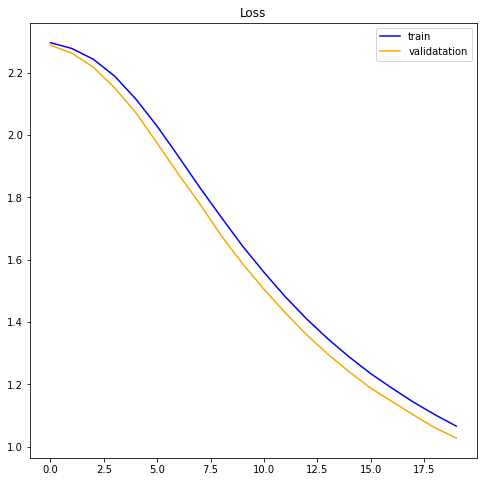

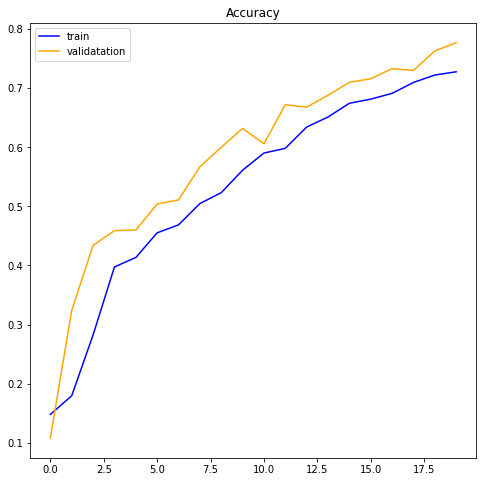

Test Accuracy is :  70.600
Train Accuracy is :  72.775
Train Confusion Matrix
[[485   0   2   5   4   8  10   0   8   0]
 [  0 548   4   4   0   4   0   1   2   1]
 [ 12  31 388  14   9   0  37   3   9   0]
 [ 11  24  22 427   5   8   4  14  15   9]
 [  2   6   0   0 339   0  15   2   0  81]
 [ 22  33   3 129  24 136  15  12  29  26]
 [  5  19   6   0   3   2 475   0   3   0]
 [  4  24   1   0   8   0   1 436   5  41]
 [ 27  56  20  82   6   0  19   5 241  26]
 [ 12   9   0   5  62   0   3  56   1 335]]
Test Confusion Matrix
[[202   0   0   0   2   4   9   0   2   0]
 [  0 279   0   3   0   0   3   0   2   0]
 [ 10  19 192  10   2   1  27   7   7   1]
 [  0   8  10 205   0   4   3  12   6   6]
 [  1   6   0   0 189   0  14   1   0  64]
 [ 12   4   6  89   8  45  10  21   8  18]
 [  7   9   2   1   6   1 199   0   0   0]
 [  1  19   5   0   4   0   0 188   4  36]
 [  9  20  14  51   9   0   4   8 103  24]
 [  3   7   1   4  47   0   1  15   3 163]]
######################################

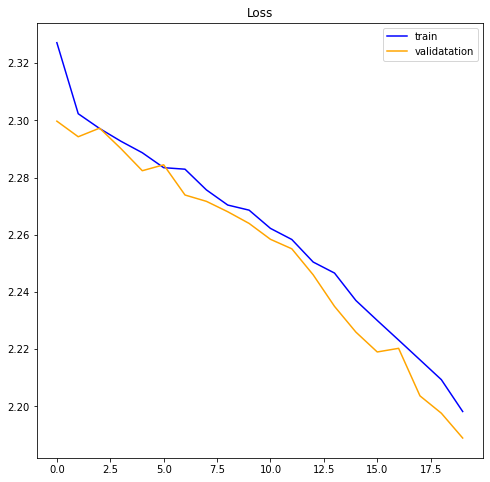

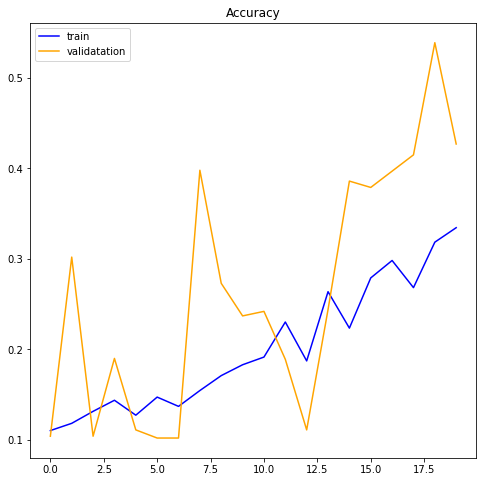

Test Accuracy is :  38.080
Train Accuracy is :  33.450
Train Confusion Matrix
[[473   2   0  46   0   0   1   0   0   0]
 [  0 554   0  10   0   0   0   0   0   0]
 [ 83 116  44 219   0   0  41   0   0   0]
 [ 10  36   0 489   0   0   3   0   0   1]
 [ 68 135   0 104   0   0  39   0   0  99]
 [ 34 133   0 258   0   0   2   0   0   2]
 [ 38  70   0  22   0   0 383   0   0   0]
 [ 45 269   0  89   0   0   1   0   0 116]
 [ 43 143   0 287   0   0   6   0   0   3]
 [ 51 158   0 101   0   0   0   0   0 173]]
Test Confusion Matrix
[[202   0   0  16   0   0   1   0   0   0]
 [  0 279   0   7   0   0   1   0   0   0]
 [ 20  82  13 144   0   0  16   0   0   1]
 [  1  15   0 237   0   0   0   0   0   1]
 [ 45  78   0  87   0   0  16   0   0  49]
 [ 16  32   0 171   0   0   1   0   0   1]
 [ 28  37   0  16   0   0 144   0   0   0]
 [ 11 163   0  59   0   0   0   0   0  24]
 [ 13  47   0 176   0   0   1   0   0   5]
 [ 12  69   0  85   0   0   1   0   0  77]]
######################################

In [46]:

Activations = ['relu','sigmoid']

for activation in Activations:
    print('####################################################################################')
    print('                     Activation Function is :          ', activation)
    print('####################################################################################')


    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model(neuron_number=100, optimizer=Adam(), activation=activation, early_stop=False)
    # fit model
    history = model.fit(trainX, trainY, epochs=20, validation_split=0.2 , verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    # learning curves
    summarize_diagnostics(history)

    print('Test Accuracy is :  %.3f' % (acc * 100.0))
    print('Train Accuracy is :  %.3f' % (history.history['accuracy'][-1] * 100.0))

    print("Train Confusion Matrix")
    print(confusion_matrix(trainY, np.argmax(model.predict(trainX), axis=1)  ) )
    
    print("Test Confusion Matrix")
    print(confusion_matrix(testY, np.argmax(model.predict(testX), axis=1)   ) )
    
    print('####################################################################################')
    print()
    print()
    print()

# Comparing Optimizers

####################################################################################
                     Optimizer is :           sgd
####################################################################################
Train Data Samples: 5000 , Test Data Samples 2500 , Feature Size(after feature-selection): 196  Input Shape is :  (5000, 196) Label Size is:  [0 1 2 3 4 5 6 7 8 9]
Epoch 1/20
125/125 [==============================] - 0s 3ms/step - loss: 2.3016 - accuracy: 0.1192 - val_loss: 2.3010 - val_accuracy: 0.1040
Epoch 2/20
125/125 [==============================] - 0s 1ms/step - loss: 2.3006 - accuracy: 0.1150 - val_loss: 2.3003 - val_accuracy: 0.1040
Epoch 3/20
125/125 [==============================] - 0s 1ms/step - loss: 2.3000 - accuracy: 0.1150 - val_loss: 2.3000 - val_accuracy: 0.1040
Epoch 4/20
125/125 [==============================] - 0s 1ms/step - loss: 2.2996 - accuracy: 0.1150 - val_loss: 2.2997 - val_accuracy: 0.1040
Epoch 5/20
125/125 [============================

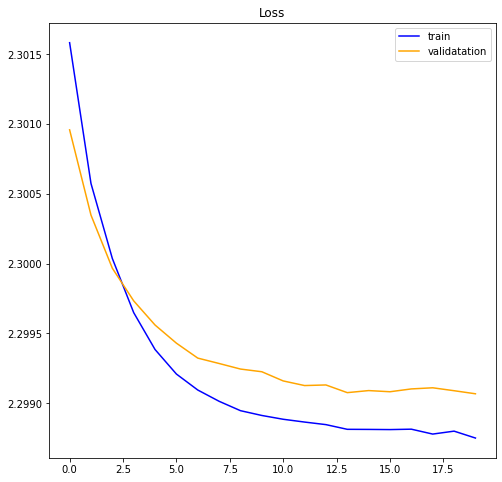

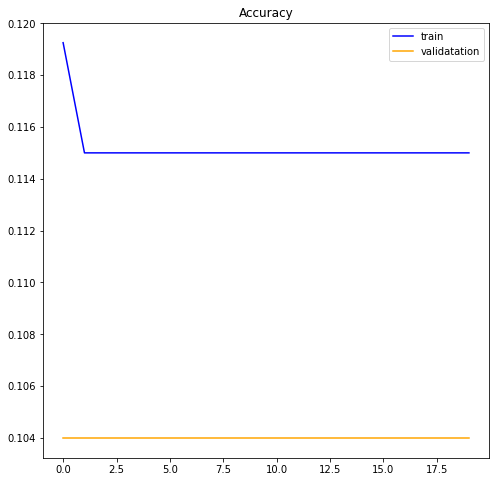

Test Accuracy is :  11.480
Train Accuracy is :  11.500
Train Confusion Matrix
[[  0 522   0   0   0   0   0   0   0   0]
 [  0 564   0   0   0   0   0   0   0   0]
 [  0 503   0   0   0   0   0   0   0   0]
 [  0 539   0   0   0   0   0   0   0   0]
 [  0 445   0   0   0   0   0   0   0   0]
 [  0 429   0   0   0   0   0   0   0   0]
 [  0 513   0   0   0   0   0   0   0   0]
 [  0 520   0   0   0   0   0   0   0   0]
 [  0 482   0   0   0   0   0   0   0   0]
 [  0 483   0   0   0   0   0   0   0   0]]
Test Confusion Matrix
[[  0 219   0   0   0   0   0   0   0   0]
 [  0 287   0   0   0   0   0   0   0   0]
 [  0 276   0   0   0   0   0   0   0   0]
 [  0 254   0   0   0   0   0   0   0   0]
 [  0 275   0   0   0   0   0   0   0   0]
 [  0 221   0   0   0   0   0   0   0   0]
 [  0 225   0   0   0   0   0   0   0   0]
 [  0 257   0   0   0   0   0   0   0   0]
 [  0 242   0   0   0   0   0   0   0   0]
 [  0 244   0   0   0   0   0   0   0   0]]
######################################

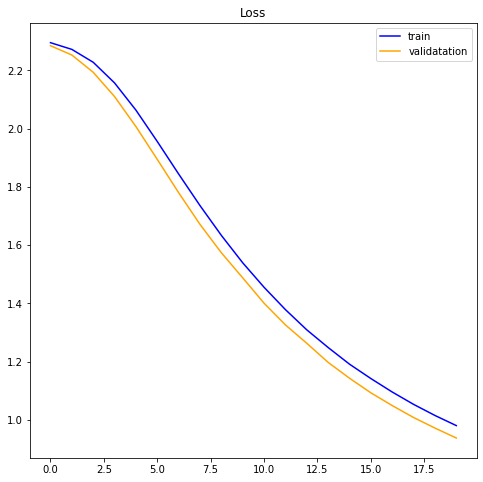

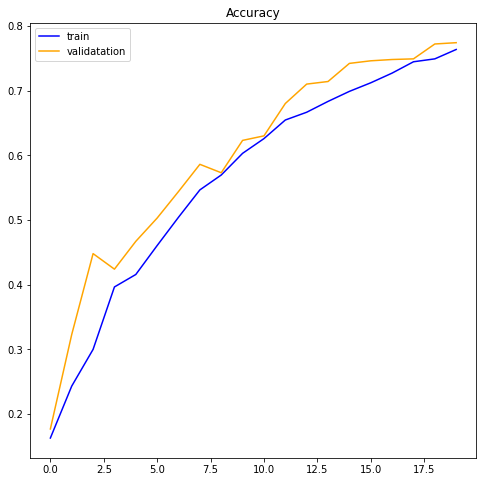

Test Accuracy is :  70.640
Train Accuracy is :  76.350
Train Confusion Matrix
[[484   0   3  11   3  14   6   0   1   0]
 [  0 548   5   3   0   4   0   2   2   0]
 [ 10  32 399  28   8   0  16   3   7   0]
 [  4  22  17 461   2   7   3  16   3   4]
 [  2   7   0   0 377   0  12   5   0  42]
 [ 23  29   7 113  22 189  11  15   9  11]
 [  7  17  14   0   5   4 465   0   1   0]
 [  3  31   1   1  10   1   0 451   1  21]
 [ 25  64  23  99  14  15  12   6 209  15]
 [ 12   9   2   6 104   0   1 109   1 239]]
Test Confusion Matrix
[[203   0   0   4   1   6   5   0   0   0]
 [  0 279   1   4   0   0   2   0   1   0]
 [ 10  20 195  28   3   0  13   7   0   0]
 [  0   8  10 213   0   2   1  15   2   3]
 [  5   7   1   0 207   0   8   6   0  41]
 [ 14   3   7  81  10  67   6  20   4   9]
 [  7   9   6   1   7   3 192   0   0   0]
 [  1  24   2   3   4   0   0 207   3  13]
 [ 10  20  16  69  13   0   2  12  90  10]
 [  4   8   1   6  73   1   0  36   2 113]]
######################################

In [50]:

Optimizers = ['sgd', 'adam']

for optimizer in Optimizers:
    print('####################################################################################')
    print('                     Optimizer is :          ', optimizer)
    print('####################################################################################')


    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model(neuron_number=100, optimizer=optimizer, activation='relu', early_stop=False)
    # fit model
    history = model.fit(trainX, trainY, epochs=20, validation_split=0.2 , verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    # learning curves
    summarize_diagnostics(history)

    print('Test Accuracy is :  %.3f' % (acc * 100.0))
    print('Train Accuracy is :  %.3f' % (history.history['accuracy'][-1] * 100.0))

    print("Train Confusion Matrix")
    print(confusion_matrix(trainY, np.argmax(model.predict(trainX), axis=1)  ) )
    
    print("Test Confusion Matrix")
    print(confusion_matrix(testY, np.argmax(model.predict(testX), axis=1)   ) )
    
    print('####################################################################################')
    print()
    print()
    print()

# Comparing Early Stopping

####################################################################################
                     Early Stoping is :           True
####################################################################################
Train Data Samples: 5000 , Test Data Samples 2500 , Feature Size(after feature-selection): 196  Input Shape is :  (5000, 196) Label Size is:  [0 1 2 3 4 5 6 7 8 9]
Epoch 1/20
125/125 [==============================] - 0s 3ms/step - loss: 2.2966 - accuracy: 0.1370 - val_loss: 2.2878 - val_accuracy: 0.1500
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 2.2758 - accuracy: 0.2188 - val_loss: 2.2585 - val_accuracy: 0.2640
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 2.2365 - accuracy: 0.2772 - val_loss: 2.2081 - val_accuracy: 0.3980
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 2.1768 - accuracy: 0.3795 - val_loss: 2.1382 - val_accuracy: 0.4250
Epoch 5/20
125/125 [=======================

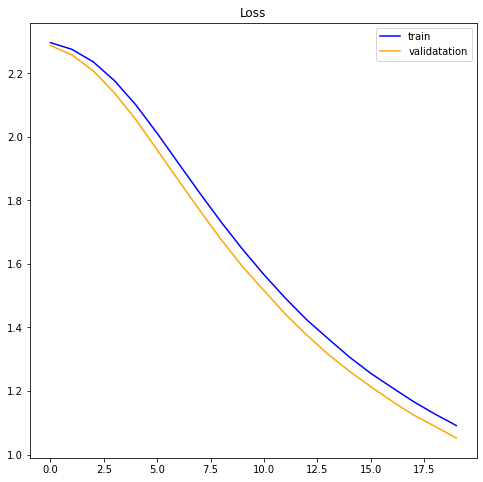

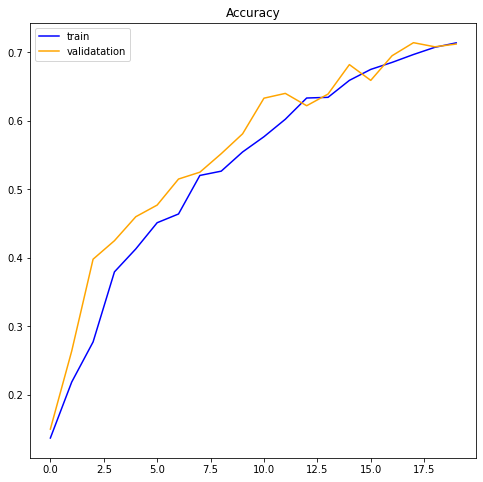

Test Accuracy is :  66.320
Train Accuracy is :  71.375
Train Confusion Matrix
[[470   0   5  16   4   8  11   0   8   0]
 [  0 551   2   5   0   0   0   2   4   0]
 [  9  47 368  30  11   0  29   3   6   0]
 [  4  31  15 454   1   1   3  18   8   4]
 [  0  13   1   0 301   0  12  10   0 108]
 [ 18  43   5 138  21  46   7  20 117  14]
 [  6  25  19   0   3   1 454   0   5   0]
 [  4  42   0   0   4   0   1 458   1  10]
 [ 22  88  15  94  10   1  11  14 214  13]
 [ 12  13   1   5  62   0   2 162   1 225]]
Test Confusion Matrix
[[193   0   0   8   2   3  10   0   3   0]
 [  0 282   2   2   0   0   1   0   0   0]
 [  8  39 173  28   2   0  18   7   1   0]
 [  0  10  10 213   0   0   1  16   3   1]
 [  2   9   1   0 161   0  13  12   0  77]
 [  8   6   6  98   5  21   6  23  38  10]
 [  6  14   7   1   5   2 189   0   1   0]
 [  1  31   2   1   3   0   0 209   2   8]
 [  8  33  10  62   9   0   2  17  90  11]
 [  2  12   1   4  42   0   2  52   2 127]]
######################################

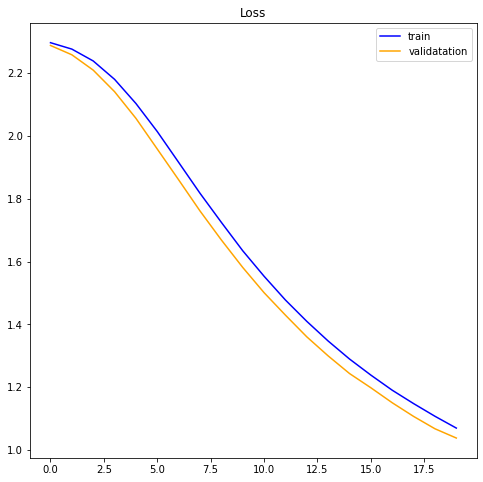

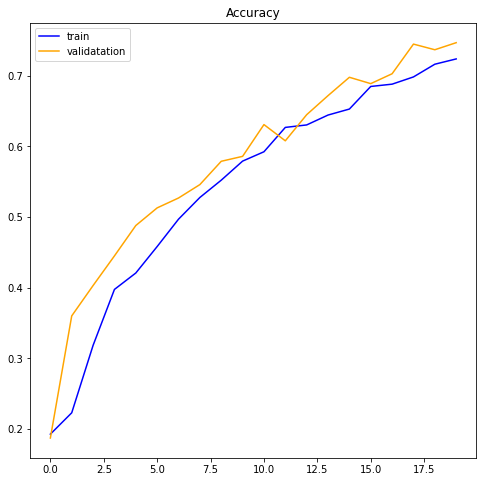

Test Accuracy is :  67.920
Train Accuracy is :  72.400
Train Confusion Matrix
[[471   0   3   4   4  11  11   1  17   0]
 [  0 550   3   1   0   0   0   1   8   1]
 [ 11  45 342  31  19   0  39   3  13   0]
 [  6  29  22 404   4   3   2  17  45   7]
 [  1   9   0   0 354   0  11   3   0  67]
 [ 21  37  12  72  31  55  14  12 154  21]
 [  7  23   3   0   6   1 469   0   4   0]
 [  2  34   0   0  11   0   0 430   2  41]
 [ 19  68  14  36  16   1  13   6 290  19]
 [ 12  11   1   1  81   0   1  67   6 303]]
Test Confusion Matrix
[[192   0   0   3   2   5  11   0   6   0]
 [  0 281   1   1   0   0   2   0   2   0]
 [  9  33 164  21   4   0  29   7   8   1]
 [  0   8  18 187   0   0   1  17  18   5]
 [  0   8   1   0 197   0  10   3   0  56]
 [ 13   3  11  54  13  14   7  20  76  10]
 [  6  12   2   1  10   1 191   0   2   0]
 [  1  26   2   0   4   0   0 196   3  25]
 [ 10  23  13  23  11   0   3  11 129  19]
 [  4   8   1   2  58   0   0  20   4 147]]
######################################

In [56]:

Stopping = [True, False]

for stopping in Stopping:
    print('####################################################################################')
    print('                     Early Stoping is :          ', stopping)
    print('####################################################################################')


    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model(neuron_number=100, optimizer=Adam(), activation='relu', early_stop=stopping)
    # fit model
    if(stopping):
        callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
        history = model.fit(trainX, trainY, epochs=20, validation_split=0.2 , verbose=1, callbacks=[callback])
    else:
        history = model.fit(trainX, trainY, epochs=20, validation_split=0.2 , verbose=1)
        
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    # learning curves
    summarize_diagnostics(history)

    print('Test Accuracy is :  %.3f' % (acc * 100.0))
    print('Train Accuracy is :  %.3f' % (history.history['accuracy'][-1] * 100.0))

    print("Train Confusion Matrix")
    print(confusion_matrix(trainY, np.argmax(model.predict(trainX), axis=1)  ) )
    
    print("Test Confusion Matrix")
    print(confusion_matrix(testY, np.argmax(model.predict(testX), axis=1)   ) )
    
    print('####################################################################################')
    print()
    print()
    print()

# Comparing Epochs

####################################################################################
                     Epoch is :           20
####################################################################################
Train Data Samples: 5000 , Test Data Samples 2500 , Feature Size(after feature-selection): 196  Input Shape is :  (5000, 196) Label Size is:  [0 1 2 3 4 5 6 7 8 9]
Epoch 1/20
125/125 [==============================] - 0s 3ms/step - loss: 2.2950 - accuracy: 0.1320 - val_loss: 2.2851 - val_accuracy: 0.2270
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 2.2728 - accuracy: 0.1875 - val_loss: 2.2548 - val_accuracy: 0.2320
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 2.2321 - accuracy: 0.2562 - val_loss: 2.2025 - val_accuracy: 0.3510
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 2.1685 - accuracy: 0.3523 - val_loss: 2.1252 - val_accuracy: 0.4220
Epoch 5/20
125/125 [==============================] -

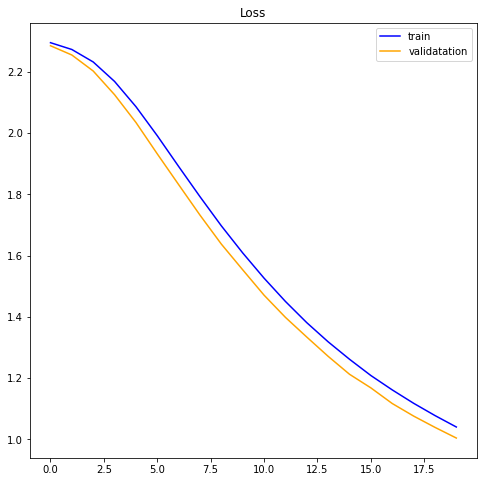

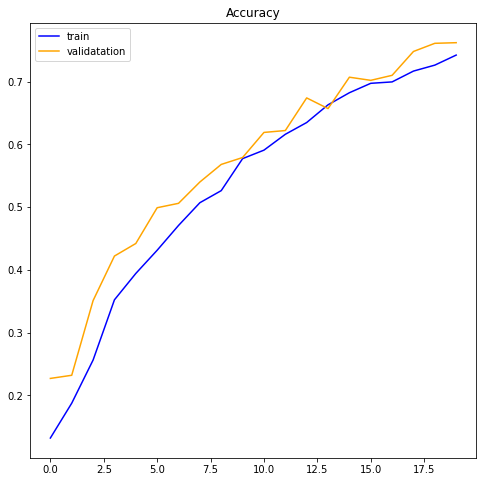

Test Accuracy is :  69.520
Train Accuracy is :  74.225
Train Confusion Matrix
[[489   0   1   3   2  14  12   0   1   0]
 [  0 549   4   4   0   4   0   1   1   1]
 [ 13  36 371  26   8   1  36   3   8   1]
 [  6  25  15 448   2   9   5  19   4   6]
 [  2   7   0   0 311   0  15   7   0 103]
 [ 26  24   4 106  23 192  20  21   0  13]
 [  7  17   2   0   3   5 479   0   0   0]
 [  4  27   0   0   5   0   0 447   3  34]
 [ 24  65  25  96   8  16  20  11 198  19]
 [ 12   8   1   4  50   0   2 121   1 284]]
Test Confusion Matrix
[[203   0   0   0   0   6  10   0   0   0]
 [  0 280   0   4   0   0   3   0   0   0]
 [ 11  25 169  21   2   1  30   9   7   1]
 [  1   8   6 205   0   7   3  18   2   4]
 [  6   8   0   0 167   0  10   8   0  76]
 [ 15   3   6  73   7  70  11  26   1   9]
 [  7   7   0   1   6   2 202   0   0   0]
 [  1  21   1   1   3   0   0 203   4  23]
 [ 10  22  15  58   9   9   3  16  83  17]
 [  4   6   1   3  37   2   0  33   2 156]]
######################################

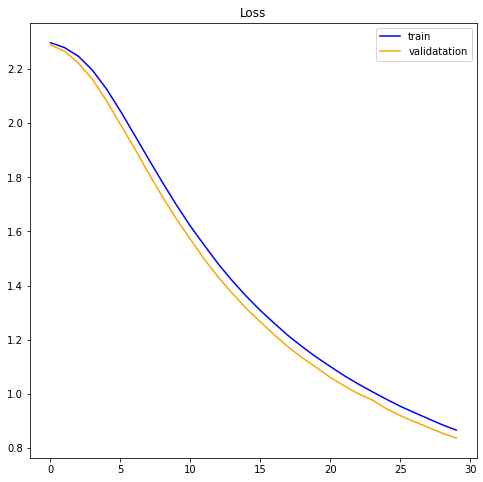

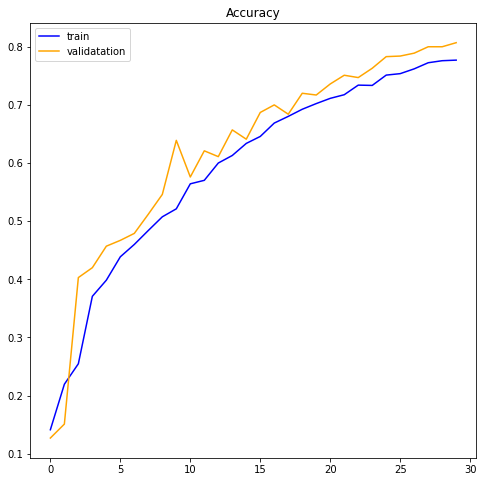

Test Accuracy is :  73.640
Train Accuracy is :  77.700
Train Confusion Matrix
[[488   0   2   3   2  16   8   0   3   0]
 [  0 544   7   3   0   2   0   2   6   0]
 [ 10  19 406  24  10   0  23   3   8   0]
 [  4  14  21 446   1  13   3  16  14   7]
 [  2   4   1   0 357   0  11   4   1  65]
 [ 24  14   9  89  21 217  12  14  19  10]
 [  7  10   6   0   4   3 481   0   2   0]
 [  4  19   2   1   8   1   0 442   5  38]
 [ 20  34  27  54  16  10  11   3 288  19]
 [ 12   7   2   5  84   0   1  66   3 303]]
Test Confusion Matrix
[[208   0   0   0   1   6   4   0   0   0]
 [  0 279   1   1   0   0   2   0   4   0]
 [  8  11 202  17   2   1  23   7   4   1]
 [  1   4  13 203   0   7   1  12   8   5]
 [  1   5   1   0 198   0   9   2   0  59]
 [ 15   0   8  65  10  79   7  22   7   8]
 [  7   3   4   0   5   3 203   0   0   0]
 [  2  15   7   1   4   0   0 197   3  28]
 [ 10  12  18  40   9   2   2   9 125  15]
 [  4   5   1   3  53   2   0  24   5 147]]
######################################

In [57]:

Epochs = [20, 30]

for epoch in Epochs:
    print('####################################################################################')
    print('                     Epoch is :          ', epoch)
    print('####################################################################################')


    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model(neuron_number=100, optimizer=Adam(), activation='relu', early_stop=False)
    # fit model
    history = model.fit(trainX, trainY, epochs=epoch, validation_split=0.2 , verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    # learning curves
    summarize_diagnostics(history)

    print('Test Accuracy is :  %.3f' % (acc * 100.0))
    print('Train Accuracy is :  %.3f' % (history.history['accuracy'][-1] * 100.0))

    print("Train Confusion Matrix")
    print(confusion_matrix(trainY, np.argmax(model.predict(trainX), axis=1)  ) )
    
    print("Test Confusion Matrix")
    print(confusion_matrix(testY, np.argmax(model.predict(testX), axis=1)   ) )
    
    print('####################################################################################')
    print()
    print()
    print()

# Question 8

# Question 9

In [5]:

from sklearn import svm, datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

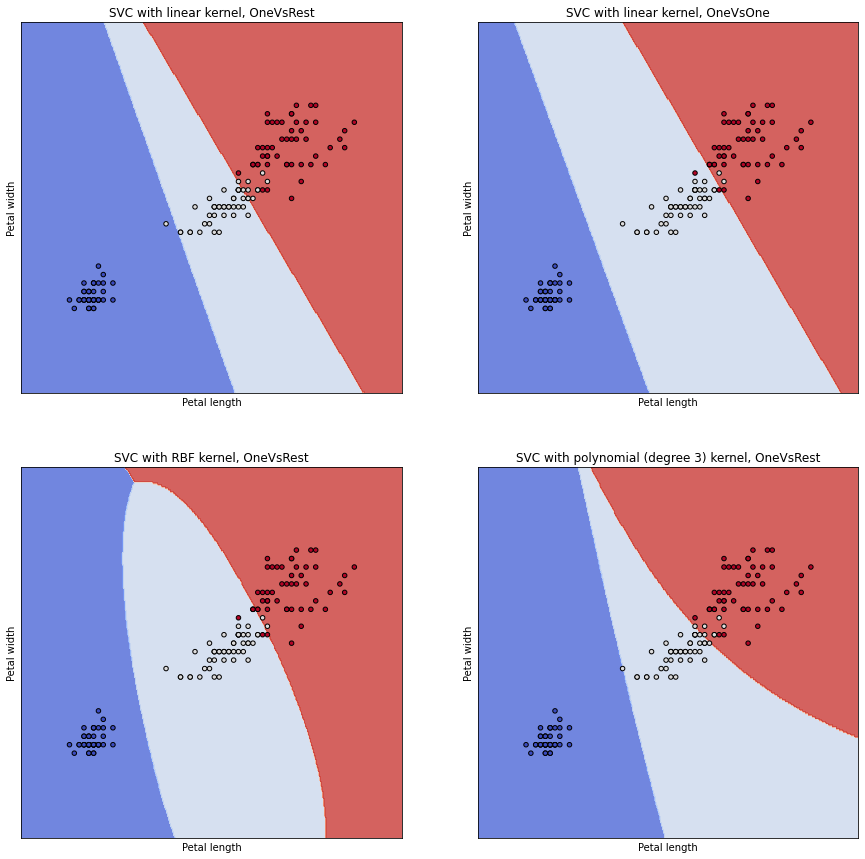

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
import copy


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, 2:]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (OneVsRestClassifier(svm.SVC(kernel='linear', C=C)),
          OneVsOneClassifier(svm.SVC(kernel='linear', C=C)),
          OneVsRestClassifier(svm.SVC(kernel='rbf', C=C)),
          OneVsRestClassifier(svm.SVC(kernel='poly', degree=3, C=C)) )
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel, OneVsRest',
          'SVC with linear kernel, OneVsOne',
          'SVC with RBF kernel, OneVsRest',
          'SVC with polynomial (degree 3) kernel, OneVsRest')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(15,15))

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()


SVC with linear kernel, OneVsRest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.78      0.88        50
           2       0.83      1.00      0.91        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



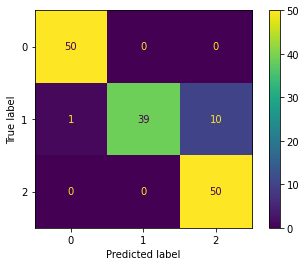

###################################


SVC with linear kernel, OneVsOne
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



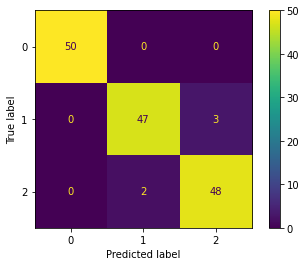

###################################


SVC with RBF kernel, OneVsRest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.96      0.93        50
           2       0.96      0.90      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



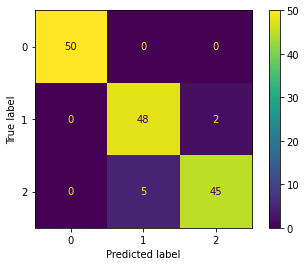

###################################


SVC with polynomial (degree 3) kernel, OneVsRest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.84      0.91        50
           2       0.88      1.00      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



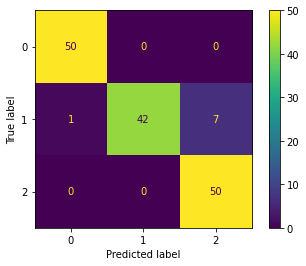

###################################




In [90]:
C = 1.0  # SVM regularization parameter
models_metrics = (OneVsRestClassifier(svm.SVC(kernel='linear', C=C)),
                  OneVsOneClassifier(svm.SVC(kernel='linear', C=C)),
                  OneVsRestClassifier(svm.SVC(kernel='rbf', C=C)),
                  OneVsRestClassifier(svm.SVC(kernel='poly', degree=3, C=C)) )
models_metrics = (clf.fit(X, y) for clf in models_metrics)
for clf, title in zip(models_metrics, titles):
    print(title)
    y_pred = clf.predict(X)
    print(classification_report(y, y_pred))
    plot_confusion_matrix(clf, X, y)
    plt.show()
    print('###################################')
    print()
    print()
    

# Question 10

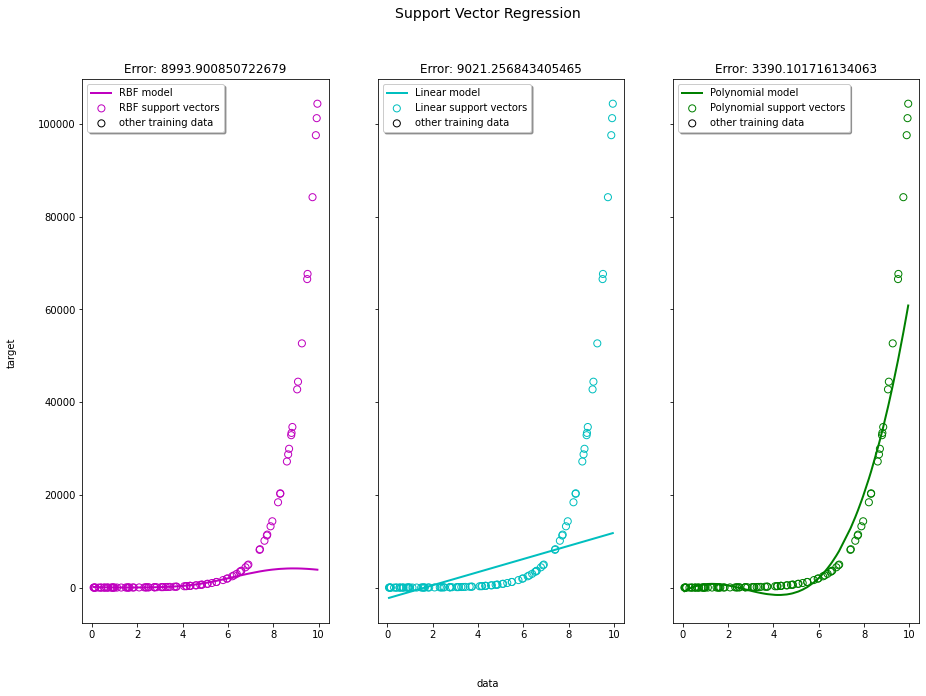

In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# #############################################################################
# Generate Input Sample
def y_(x):
    return 5 * np.exp(x) + 3

X = np.sort(np.random.random(100)*10, axis=0).reshape(-1,1)
y = y_(X).ravel()

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(fancybox=True, shadow=True)
    
    
    axes[ix].title.set_text('Error: ' + str(mean_absolute_error(svr.predict(X), y)))

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

# Boston Housing

In [3]:
import io 
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

df = []
with io.open("housing_data.txt", mode="r", encoding="utf-8") as f:
    for line in f:
        df.append(line.split())

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(df, columns=columns)
df.MEDV = df.MEDV.astype(float)

df = df.sort_values('MEDV').reset_index(drop=True)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

display(X)
display(y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,38.35180,0.00,18.100,0,0.6930,5.4530,100.00,1.4896,24,666.0,20.20,396.90,30.59
1,67.92080,0.00,18.100,0,0.6930,5.6830,100.00,1.4254,24,666.0,20.20,384.97,22.98
2,25.04610,0.00,18.100,0,0.6930,5.9870,100.00,1.5888,24,666.0,20.20,396.90,26.77
3,9.91655,0.00,18.100,0,0.6930,5.8520,77.80,1.5004,24,666.0,20.20,338.16,29.97
4,45.74610,0.00,18.100,0,0.6930,4.5190,100.00,1.6582,24,666.0,20.20,88.27,36.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2.01019,0.00,19.580,0,0.6050,7.9290,96.20,2.0459,5,403.0,14.70,369.30,3.70
502,0.01381,80.00,0.460,0,0.4220,7.8750,32.00,5.6484,4,255.0,14.40,394.23,2.97
503,0.01501,90.00,1.210,1,0.4010,7.9230,24.80,5.8850,1,198.0,13.60,395.52,3.16
504,0.52693,0.00,6.200,0,0.5040,8.7250,83.00,2.8944,8,307.0,17.40,382.00,4.63


0       5.0
1       5.0
2       5.6
3       6.3
4       7.0
       ... 
501    50.0
502    50.0
503    50.0
504    50.0
505    50.0
Name: MEDV, Length: 506, dtype: float64

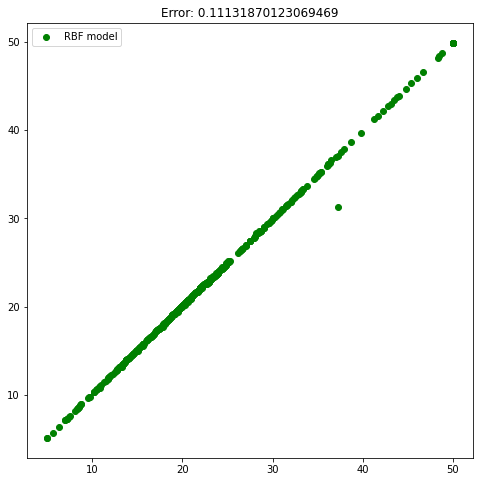

In [4]:
# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100,  gamma='auto').fit(X, y)
# svr_lin = SVR(kernel='linear', C=100,  gamma='auto').fit(X, y)
# svr_poly = SVR(kernel='poly', C=1, degree=3, gamma='auto').fit(X, y)

# svr_rbf = SVR(kernel='rbf', C=1).fit(X, y)
# svr_lin = SVR(kernel='linear', C=1).fit(X, y)
# svr_poly = SVR(kernel='poly', C=1).fit(X, y)
# #############################################################################

# svrs = [svr_rbf, svr_lin, svr_poly]
# kernel_label = ['RBF', 'Linear', 'Polynomial']
# model_color = ['m', 'c', 'g']

# for ix, svr in enumerate(svrs):
y_pred = svr_rbf.predict(X)
plt.figure(figsize=(8,8))
plt.scatter(y, y_pred, color='g', label='RBF model')

plt.title('Error: ' + str(mean_absolute_error(y, y_pred)) )
plt.legend()
plt.show()   